In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Data/SupervisedLearningWShop/spx.csv')
df['date'] = pd.to_datetime(df['date'])
print(df.head())
print(df.tail())

        date   close
0 1986-01-02  209.59
1 1986-01-03  210.88
2 1986-01-06  210.65
3 1986-01-07  213.80
4 1986-01-08  207.97
           date    close
8187 2018-06-25  2717.07
8188 2018-06-26  2723.06
8189 2018-06-27  2699.63
8190 2018-06-28  2716.31
8191 2018-06-29  2718.37


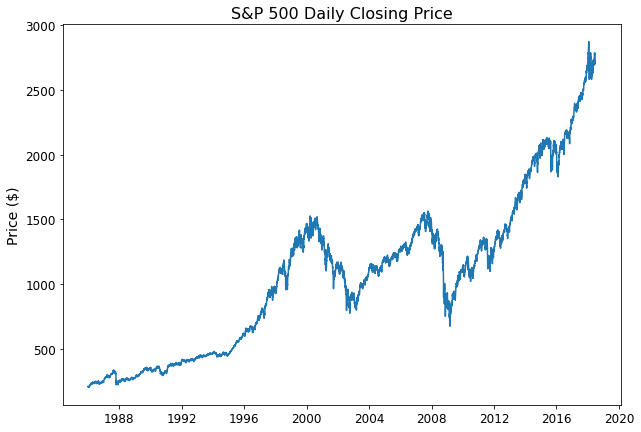

In [3]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(df.date, df.close)
ax.set_title('S&P 500 Daily Closing Price', 
             fontsize = 16)
ax.set_ylabel('Price ($)', fontsize = 14)
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

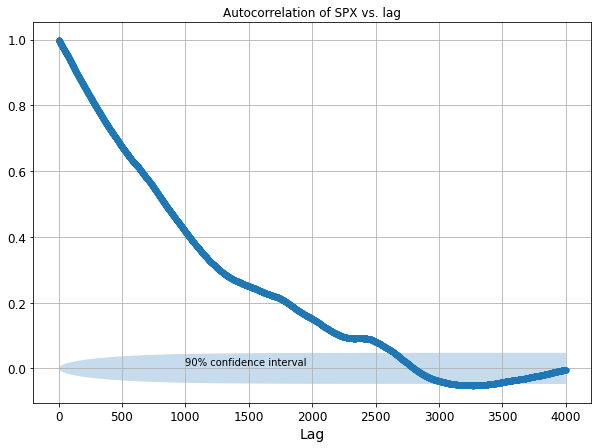

In [4]:
max_lag = 4000
fig, ax = plt.subplots(figsize = (10, 7))
acf_plot = plot_acf(x = df.close,
                    ax = ax,
                    lags = max_lag,
                    use_vlines = False,
                    alpha = 0.9,
                    title = 'Autocorrelation of SPX vs. lag')
ax.grid(True)
ax.text(1000, 0.01, '90% confidence interval')
ax.set_xlabel('Lag', fontsize = 14)
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

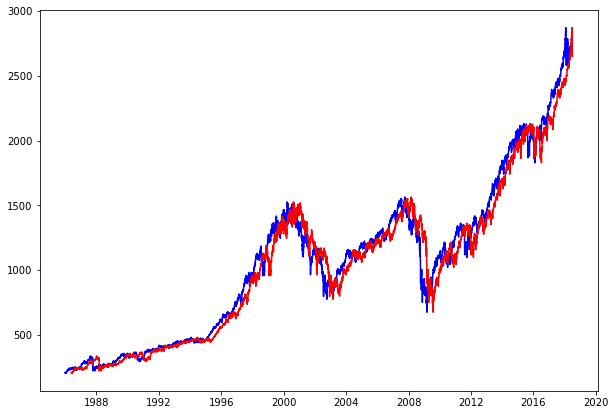

In [5]:
spx_shift_100 = df.copy()
spx_shift_100['close'] = df.close.shift(100)
fix, ax = plt.subplots(figsize = (10, 7))
ax.plot(df.date, df.close, c = "blue")
ax.plot(spx_shift_100.date, spx_shift_100.close, c = "red")
plt.show()

        date  close
0 1986-01-02    NaN
1 1986-01-03    NaN
2 1986-01-06    NaN
3 1986-01-07    NaN
4 1986-01-08    NaN 
            date    close
8187 2018-06-25  2823.81
8188 2018-06-26  2821.98
8189 2018-06-27  2762.13
8190 2018-06-28  2648.94
8191 2018-06-29  2695.14


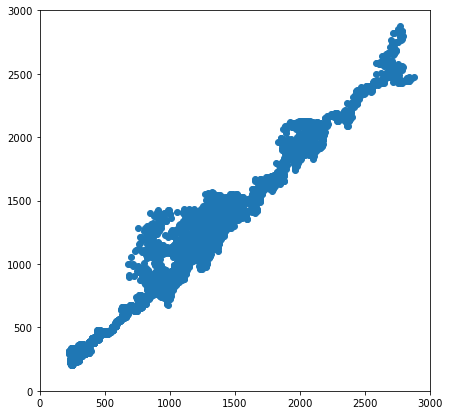

In [7]:
print(spx_shift_100.head(), '\n', spx_shift_100.tail())
fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(df.loc[100:, 'close'],
          spx_shift_100.loc[100:, 'close'])
ax.set_xlim(0, 3000)
ax.set_ylim(0, 3000)
plt.show()

In [8]:
# the statsmodels plot_acf is based upon the numpy correlate
# function, so we can generate the actual values for 
# illustration and so we can label some later plots
# the standard presentation of an acf plot has the value at 
# lag 0 == 1; the correlate function returns unscaled
# values so we get the first value for scaling to 1
# the values to be tested in the function must have
# the mean of the un-shifted series subtracted from 
# both series
corr0 = np.correlate(df.close[0: ] - 
                     df.close.mean(), 
                     df.close[0: ] - 
                     df.close.mean(), 
                     mode = 'valid')
corrs = [np.correlate(df.close[:(df.close.shape[0] - i)] - 
                     df.close.mean(), 
                      df.close[i: ] - 
                      df.close.mean(), 
                      mode = 'valid')
        for i in range(max_lag)] / corr0

In [9]:
# utility function to plot out a range of 
# plots depicting self-correlation
def plot_lag_grid(series, corrs, 
                  axis_min, axis_max, 
                  num_plots, total_lag,
                  n_rows, n_cols):
    lag_step = int(total_lag / num_plots)
    fig = plt.figure(figsize = (18, 16))
    for i in range(num_plots):
        corr = corrs[lag_step * i]
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        ax.scatter(series, series.shift(lag_step * i))
        ax.set_xlim(axis_min, axis_max)
        ax.set_ylim(axis_min, axis_max)
        ax.set_title('lag = ' + str(lag_step * i))
        ax.text(axis_min + 0.05 * (axis_max - axis_min),
                axis_max - 0.05 * (axis_max - axis_min),
                'correlation = ' + str(round(corr[0], 3)))
    fig.tight_layout()
    plt.show()

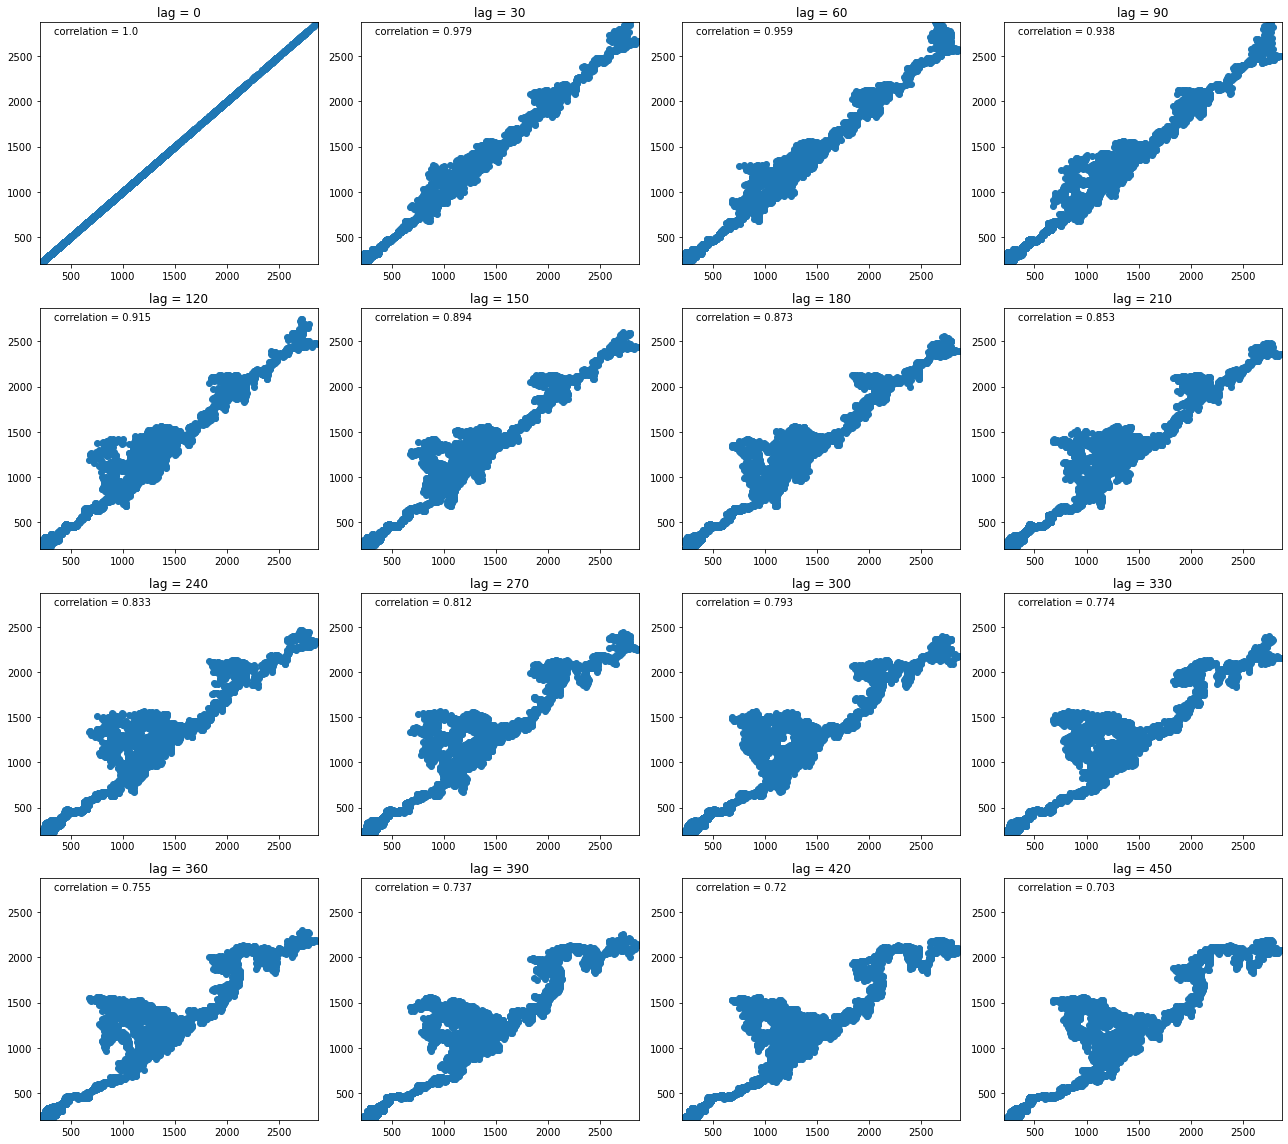

In [10]:
# create a grid to see how well the data at increasing 
# lags correlates to the original data
# 'perfect' correlation will appear as a diagonal line
# the farther from the line, the poorer the correlation
plot_lag_grid(df.close, corrs,
              df.close.min(), df.close.max(),
              num_plots = 16,
              total_lag = 480,
              n_rows = 4, n_cols = 4)

In [11]:
# statsmodels AR function builds an autoregression model
# using all the defaults, it will determine the max lag
# and provide all the model coefficients
model = AR(df.close)
model_fit = model.fit()
# model fit now contains all the model information
max_lag = model_fit.k_ar
# note that by using defaults, the maximum lag is 
# computed as round(12*(nobs/100.)**(1/4.))
# see https://www.statsmodels.org/devel/generated/statsmodels.tsa.ar_model.AR.fit.html#statsmodels.tsa.ar_model.AR.fit
print('Max Lag: ' + str(max_lag))
print('Coefficients: \n' + str(model_fit.params))

Max Lag: 36
Coefficients: 
const        0.114237
L1.close     0.944153
L2.close     0.008452
L3.close     0.046900
L4.close    -0.014887
L5.close    -0.024734
L6.close     0.025849
L7.close    -0.004821
L8.close     0.009209
L9.close    -0.010451
L10.close    0.033449
L11.close   -0.029657
L12.close    0.052843
L13.close   -0.031489
L14.close   -0.023010
L15.close   -0.018195
L16.close    0.060165
L17.close    0.004425
L18.close   -0.057269
L19.close    0.025184
L20.close    0.008416
L21.close   -0.020273
L22.close    0.024271
L23.close   -0.010330
L24.close    0.004574
L25.close   -0.016035
L26.close    0.005954
L27.close    0.032375
L28.close   -0.037643
L29.close    0.024265
L30.close   -0.006099
L31.close   -0.018106
L32.close    0.005761
L33.close   -0.002750
L34.close   -0.037882
L35.close    0.046765
L36.close    0.000887
dtype: float64


C:\Tools\Anaconda3\envs\classicRegression\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, F

In [12]:
# how far into the future we want to predict
max_forecast = 365
# generate predictions from the model
pred_close = pd.DataFrame({'pred_close': 
                           model_fit.predict(start = max_lag,
                                             end = df.shape[0] + 
                                             max_forecast - 1)})
# attach the dates for visualization
pred_close['date'] = df.loc[pred_close.index, 'date'].reindex()
pred_close.loc[(max(df.index) + 1):, 'date'] = \
    pd.to_datetime([max(df.date) + 
                    pd.Timedelta(days = i)
                    for i in range(1, max_forecast + 1)])
# visualize the predictions overlaid on the real data
# as well as the extrapolation to the future
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(df.date, 
        df.close, 
        c = "blue", 
        linewidth = 4,
        label = 'actual SPX close')
ax.plot(pred_close.loc[0 : len(df.close), 'date'], 
        pred_close.loc[0 : len(df.close), 'pred_close'], 
        c = "yellow", 
        linewidth = 0.5,
        label = 'predicted SPX close')
ax.plot(pred_close.loc[len(df.close):, 'date'], 
        pred_close.loc[len(df.close):, 'pred_close'], 
        c = "red", 
        linewidth = 2,
        label = 'forecast SPX close')
ax.set_xlabel('Date', fontsize = 14)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend()
plt.show()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([8192, 8193, 8194, 8195, 8196,\n            ...\n            8552, 8553, 8554, 8555, 8556],\n           dtype='int64', length=365). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
# compare predicted vs. actual 
fig, ax = plt.subplots(figsize = (10, 7))
ax.scatter(df.loc[max_lag:(df.shape[0] - 1), 'close'], 
pred_close.loc[max_lag:(df.shape[0] - 1), 'pred_close'])
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_xlabel('SPX actual value', fontsize = 14)
ax.set_ylabel('SPX predicted value', fontsize = 14)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
residuals = pd.DataFrame({'date' : (df.loc[max_lag:(df.shape[0] - 1), 'date']),
                          'residual' : df.loc[max_lag:(df.shape[0] - 1), 'close'] -
                          pred_close.loc[max_lag:(df.shape[0] - 1), 'pred_close']})
ax.scatter(residuals.date, residuals.residual)
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel('residual (' + r'$SPX_{act} - SPX_{pred}$' + 
              ')', fontsize = 14)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
pct_residuals = pd.DataFrame({'date' : residuals.date,
                              'pct_residual' : 100 * residuals.residual / 
                              df.loc[max_lag:(df.shape[0] - 1), 'close']})
ax.scatter(pct_residuals.date, pct_residuals.pct_residual)
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel('% residual 100 *(' + 
              r'$SPX_{act} - SPX_{pred}$' + ') / ' + 
              r'$SPX_{act}$', fontsize = 14)
plt.show()